# 1. Import Library

# 資料準備

In [2]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [3]:
all_df = pd.read_excel("./titanic3.xls")

In [4]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [5]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [6]:
train_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


In [7]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [8]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [9]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [10]:
train_Features[:2]

array([[0.        , 0.        , 0.38844819, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00679502, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [11]:
train_Label[:2]

array([1., 1.])

# 3. Create Model 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [13]:
model = Sequential()

In [14]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

# 4. Train model

In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Epoch 1/30
31/31 - 1s - loss: 0.6907 - accuracy: 0.5817 - val_loss: 0.6793 - val_accuracy: 0.7885
Epoch 2/30
31/31 - 0s - loss: 0.6717 - accuracy: 0.6720 - val_loss: 0.6237 - val_accuracy: 0.7885
Epoch 3/30
31/31 - 0s - loss: 0.6076 - accuracy: 0.7441 - val_loss: 0.5158 - val_accuracy: 0.7885
Epoch 4/30
31/31 - 0s - loss: 0.5261 - accuracy: 0.7828 - val_loss: 0.4842 - val_accuracy: 0.7885
Epoch 5/30
31/31 - 0s - loss: 0.4937 - accuracy: 0.7613 - val_loss: 0.4446 - val_accuracy: 0.7885
Epoch 6/30
31/31 - 0s - loss: 0.4841 - accuracy: 0.7634 - val_loss: 0.4440 - val_accuracy: 0.7885
Epoch 7/30
31/31 - 0s - loss: 0.4778 - accuracy: 0.7656 - val_loss: 0.4333 - val_accuracy: 0.7692
Epoch 8/30
31/31 - 0s - loss: 0.4768 - accuracy: 0.7624 - val_loss: 0.4359 - val_accuracy: 0.7981
Epoch 9/30
31/31 - 0s - loss: 0.4728 - accuracy: 0.7720 - val_loss: 0.4320 - val_accuracy: 0.7885
Epoch 10/30
31/31 - 0s - loss: 0.4699 - accuracy: 0.7634 - val_loss: 0.4299 - val_accuracy: 0.8077
Epoch 11/30
31/31 -

# 6. Print History

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

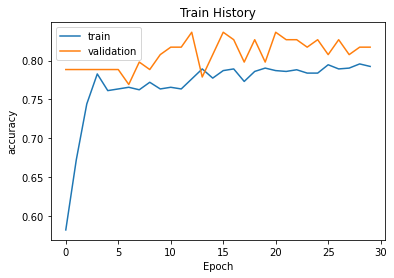

In [20]:
show_train_history(train_history,'accuracy','val_accuracy')

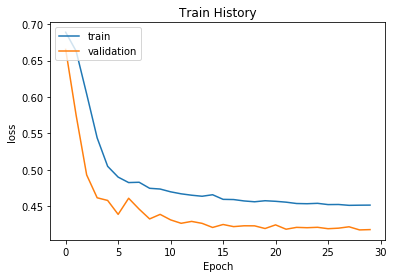

In [20]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

9/9 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.7964


In [22]:
scores[1]

0.7963636517524719

# 預測資料

# 加入Jack & Rose資料

In [23]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [24]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [25]:
all_df=pd.concat([all_df,JR_df])

In [26]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 進行預測

In [27]:
all_Features,Label=PreprocessData(all_df)

In [28]:
all_probability=model.predict(all_Features)

In [29]:
all_probability[:10]

array([[0.97347295],
       [0.527013  ],
       [0.9723482 ],
       [0.34712243],
       [0.9684906 ],
       [0.24962044],
       [0.9425216 ],
       [0.29558796],
       [0.9433813 ],
       [0.32405025]], dtype=float32)

In [30]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

# 預測Jack & Rose資料的生存機率

In [31]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.137034
1,1,Rose,1,female,20.0,1,0,100.0,S,0.967787


# 查看生存機率高，卻沒有存活

In [32]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972348
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.968491
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.979043
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.976292
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.954251


In [33]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.973473
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.527013
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972348
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.347122
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.968491


# KNeighbors

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(train_Features,train_Label)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5, scoring='accuracy', verbose=1)
#fit model to training data
knn_gs.fit(train_Features,train_Label)
#from pprint import pprint
#pprint(knn_gs.cv_results_)

#print(knn_gs.cv_results_.keys())
#for i in ['mean_test_score', 'std_test_score', 'param_n_neighbors']:
#    print(i," : ",knn_gs.cv_results_[i])

import pandas as pd
df = pd.DataFrame(list(zip(knn_gs.cv_results_['param_n_neighbors'], knn_gs.cv_results_['mean_test_score'],knn_gs.cv_results_['std_test_score'])),
               columns =['param_n_neighbors','mean_test_score','std_test_score'])
df

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished


,param_n_neighbors,mean_test_score,std_test_score
0,1,0.623789,0.063470
1,2,0.643112,0.082043
2,3,0.649918,0.070901
3,4,0.649866,0.083317
4,5,0.668233,0.087769
5,6,0.666287,0.092813
6,7,0.674016,0.096908
7,8,0.673050,0.100591
8,9,0.687562,0.103760
9,10,0.686586,0.106056


In [36]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 20}


# RandomForest

In [37]:
#create a new rf classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(train_Features,train_Label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [39]:
feature_names =['pclass', 'sex','age', 'sibsp','parch', 'fare','embarked_C','embarked_Q','embarked_S']

<BarContainer object of 9 artists>

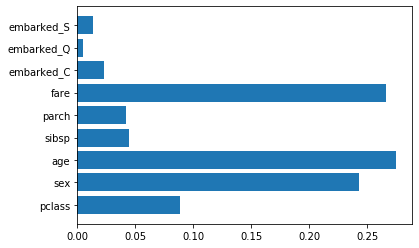

In [40]:
plt.barh(feature_names, rf_best.feature_importances_)
# sorted_idx = rf_best.feature_importances_.argsort()
# plt.barh(feature_names[sorted_idx], rf_best.feature_importances_[sorted_idx])
# plt.xlabel("Xgboost Feature Importance")

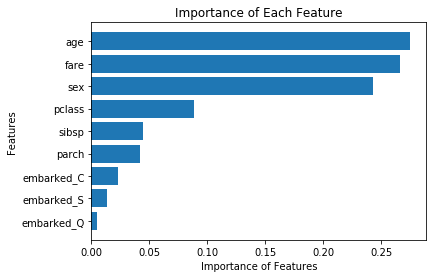

In [41]:
names=feature_names
imp=rf_best.feature_importances_
zip(imp,names)
imp, names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()

# LogisticRegression

In [42]:
#create a new logistic regression model
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(train_Features,train_Label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#test the three models with the test data and print their accuracy scores
X_test, y_test=test_Features,test_Label
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

knn: 0.8072727272727273
rf: 0.7963636363636364
log_reg: 0.8072727272727273


# Ensemble learning: Voting

In [44]:
X_train, y_train=train_Features,train_Label
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.8109090909090909

# SVM Linear/Radial Kernel

In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score
SVM_clf = svm.SVC(kernel='linear')
SVM_clf.fit(X_train, y_train)
y_pred_linear = SVM_clf.predict(X_train)
y_pred_linear_sub = SVM_clf.predict(X_test)
print("Linear Kernel Accuracy:", round(accuracy_score(y_train, y_pred_linear), 7))

Linear Kernel Accuracy: 0.7727273


In [46]:
SVM_clf = svm.SVC(kernel='rbf')
SVM_clf.fit(X_train, y_train)
y_pred_rbf = SVM_clf.predict(X_train)
y_pred_rbf_sub = SVM_clf.predict(X_test)
print("Radial Kernel Accuracy:", round(accuracy_score(y_train, y_pred_rbf), 7))

Radial Kernel Accuracy: 0.7959381


In [47]:
y_pred = SVM_clf.predict(X_test)

SVM_clf.score(X_test, y_test)
# 0.7988826815642458

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87       181
         1.0       0.88      0.54      0.67        94

    accuracy                           0.82       275
   macro avg       0.84      0.75      0.77       275
weighted avg       0.83      0.82      0.80       275



# XGBoost

# RandomizedSearch

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(X_train, y_train)
gbm_new = XGBClassifier(max_depth=7, learning_rate=0.45, n_estimators=19, colsample_bytree=1)
gbm_new.fit(X_train, y_train)
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoos

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jeffery.chi/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:04:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:04:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:04:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:04:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:04:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.4s finished


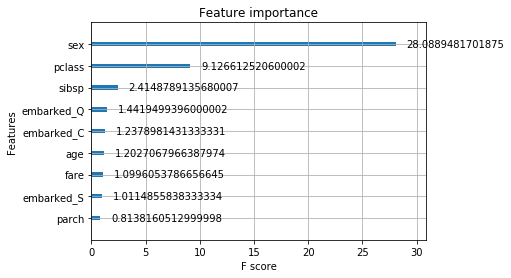

In [49]:
from xgboost import plot_importance
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# fig,ax = plt.subplots(figsize=(5,5))
# plot_importance(gbm_new,
#                 height=0.5,
#                 ax=ax,
#                 max_num_features=64)
# plt.show()


#im=pd.DataFrame({'importance':gbm_new.feature_importances_,'var':data4.columns[:-1]})
#im=im.sort_values(by='importance',ascending=False)

# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
# model = joblib.load("your_saved.model")
gbm_new.get_booster().feature_names =['pclass', 'sex','age', 'sibsp','parch', 'fare','embarked_C','embarked_Q','embarked_S']
#Error ['survived', 'name','pclass', 'sex','age', 'sibsp','parch', 'fare','embarked']
# xgboost.plot_importance(model.get_booster())
xgb.plot_importance(gbm_new,max_num_features=10,importance_type='gain')

# print(gbm_new.feature_importances_)  
# pyplot.bar(range(len(gbm_new.feature_importances_)), gbm_new.feature_importances_)  
# pyplot.show() 



In [50]:
# gbm_new.get_score(importance_type='gain')
gbm_new.get_booster().get_score(importance_type="gain")

{'sex': 28.0889481701875,
 'pclass': 9.126612520600002,
 'fare': 1.0996053786656645,
 'age': 1.2027067966387974,
 'parch': 0.8138160512999998,
 'sibsp': 2.4148789135680007,
 'embarked_C': 1.2378981431333331,
 'embarked_S': 1.0114855838333334,
 'embarked_Q': 1.4419499396000002}

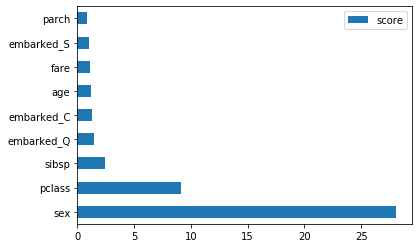

In [51]:
feature_important = gbm_new.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [52]:

### plot feature importance

# plot_tree(gbm_new)
# plt.show()
### make prediction for test data
#y_pred = model.predict(X_test)

### model evaluate
#accuracy = accuracy_score(y_test,y_pred)
#print("accuarcy: %.2f%%" % (accuracy*100.0))

# RandomForest

# GridSearchCV

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit


In [54]:
clf = RandomForestClassifier()

parameters = {'n_estimators':[4, 15, 50],# , [50, 100, 200]
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }


acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer,cv=5, verbose=1)

In [55]:
grid_obj = grid_obj.fit(train_Features, train_Label)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:  2.6min finished


In [56]:
clf = grid_obj.best_estimator_ 

In [57]:
clf.fit(train_Features, train_Label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
#check best n_estimators value
print(grid_obj.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4}


In [59]:
rf_best_grid_obj = grid_obj.best_estimator_

In [60]:
print('rf: {}'.format(rf_best_grid_obj.score(X_test, y_test)))

rf: 0.7636363636363637


In [61]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.random.seed(7)  # 指定亂數種子
# 載入波士頓房屋資料集
# 分割訓練和測試資料集
X_train, Y_train = train_Features, train_Label     # 訓練資料前404筆
X_test, Y_test = test_Features, test_Label       # 測試資料後102筆
# 定義模型
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
# 編譯模型
model.compile(loss="mse", optimizer="adam",
metrics=["mae"])
# 訓練模型
model.fit(X_train, Y_train, epochs=80, batch_size=16, verbose=0)
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test)
print("MSE_test: ", mse)
print("MAE_test: ", mae)

9/9 [==============================] - 0s 1ms/step - loss: 0.1401 - mae: 0.2898
MSE_test:  0.14014288783073425
MAE_test:  0.2898001968860626


# Linear/Lasso/Ridge Regression

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [63]:
regr=linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
regr.score(X_train, Y_train)

0.3707988972041224

In [65]:
clf_lasso=linear_model.Lasso(alpha=0.5)
clf_lasso.fit(X_train, Y_train)
clf_lasso.score(X_train, Y_train)

0.0

In [66]:
clf_lasso=linear_model.Ridge(alpha=0.5)
clf_lasso.fit(X_train, Y_train)
clf_lasso.score(X_train, Y_train)

0.3706956405708193